In [2]:
import sys
sys.path.insert(0, '../')

import numpy as np
import matplotlib.pyplot as mpl_plt
from tests.test3 import Test
from visualizer.main import Visualizer
import math

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [5]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [20]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill= False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [21]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

In [51]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [6]:
%matplotlib tk

'''

Funkcja która za pomocją myszki pozwala wprowadzić wielokąt. Wykorzystuje ona
bibliotekę matplotlib, konkretnie kolekcje pyplot.

Punkty należy podać odwrotnie do wskazówek zegara.

Aby zamknnąć wielokąt proszę kliknąć prawaym przyciskiem myszy.

'''
def make_polygon():

    polygon = []
    events = []
    is_poligon_open = True

    def draw_point(point):

        mpl_plt.scatter(point[0], point[1], color="orange")
        mpl_plt.show()

    def draw_line(points):

        ax = mpl_plt.gca()
        x = [points[0][0], points[1][0]]
        y = [points[0][1], points[1][1]]
        ax.plot(x, y, color="purple")
        ax.figure.canvas.draw()

    def onclick(event):

        nonlocal is_poligon_open
        if  is_poligon_open:
            if event.button == 1:
                x = event.xdata
                y = event.ydata
                polygon.append((x, y))
                events.append(event)
                draw_point((x, y))
                if len(polygon) > 1:
                    draw_line([polygon[-2], polygon[-1]])
            elif event.button == 3 and len(polygon) > 2:
                draw_line([polygon[-1], polygon[0]])
                is_poligon_open = False
                ax.set_title("Poligon zamknięt, do zobaczenia ;-)")
                mpl_plt.pause(1)
                mpl_plt.close()

    fig, ax = mpl_plt.subplots()
    mpl_plt.get_current_fig_manager().set_window_title("Wygeneruj wielokąt")
    ax.set_title("Kliknij, aby dodać wierzchołek wielokąta")

    fig.canvas.mpl_connect("button_press_event", onclick)
    ax.set_xlim([0, 2])
    ax.set_ylim([0, 2])
    ax.set_aspect(1)
    mpl_plt.tight_layout()
    mpl_plt.ion()
    mpl_plt.show()

    return polygon
polygon=make_polygon()


In [9]:
draw_polygon(polygon)
print(polygon)


[(np.float64(1.5155604516662078), np.float64(0.6259983475626547)), (np.float64(1.5750481960892317), np.float64(1.3448085926741942)), (np.float64(1.0297438722115118), np.float64(1.7215643073533458)), (np.float64(0.3158909391352246), np.float64(1.2357477278986502)), (np.float64(0.8017075185899202), np.float64(0.5218947948223628))]


In [8]:
polygon_one=  [(np.float64(1.8526576700633433), np.float64(0.16496832828421912)), (np.float64(1.17350592123382), np.float64(1.9496006609749374)), (np.float64(1.153676673092812), np.float64(1.498485265767006)), (np.float64(0.9999999999999999), np.float64(1.2952354723216741)), (np.float64(0.7769209584136602), np.float64(1.1861746075461304)), (np.float64(0.5538419168273204), np.float64(1.1266868631231064)), (np.float64(0.26631781878270455), np.float64(1.1068576149820983))]

polygon_two = [(np.float64(1.5205177637014597), np.float64(1.9000275406224179)), (np.float64(1.2676948499036076), np.float64(1.9049848526576698)), (np.float64(0.10272652161938878), np.float64(1.1316441751583584)), (np.float64(0.3307628752409806), np.float64(1.0771137427705864)), (np.float64(0.16221426604241274), np.float64(0.5813825392453867)), (np.float64(0.3952079316992565), np.float64(0.5665106031396308)), (np.float64(0.5538419168273204), np.float64(1.2208757917928943)), (np.float64(1.3420545304323879), np.float64(1.671991187000826)), (np.float64(1.7535114293583036), np.float64(1.7066923712475899)), (np.float64(1.7733406774993115), np.float64(1.8008812999173778))]

polygon_three= [(np.float64(0.6282015973561003), np.float64(0.30873037730652697)), (np.float64(1.5304323877719637), np.float64(0.3434315615532909)), (np.float64(1.9468465987331314), np.float64(0.8342054530432386)), (np.float64(1.9270173505921235), np.float64(1.577802258331038)), (np.float64(1.5155604516662078), np.float64(1.9644725970806938)), (np.float64(0.8314513908014322), np.float64(1.9347287248691816)), (np.float64(0.3803359955935005), np.float64(1.468741393555494)), (np.float64(0.3406774993114845), np.float64(0.6805287799504267))]

polygon_four= [(np.float64(0.4199944918755164), np.float64(0.13026714403745518)), (np.float64(1.9022307904158633), np.float64(0.40291930597631487)), (np.float64(1.158633985128064), np.float64(0.6606995318094186)), (np.float64(1.9022307904158633), np.float64(0.8837785733957586)), (np.float64(1.5700908840539798), np.float64(0.9977967502065543)), (np.float64(1.8824015422748555), np.float64(1.1713026714403743)), (np.float64(1.1834205453043238), np.float64(1.498485265767006)), (np.float64(1.8724869182043515), np.float64(1.8504544202698978)), (np.float64(0.2712751308179566), np.float64(1.9644725970806938))]

polygon_five= [(np.float64(1.6890663729000277), np.float64(1.642247314789314)), (np.float64(1.213164417515836), np.float64(1.895070228587166)), (np.float64(0.38529330762875247), np.float64(1.895070228587166)), (np.float64(0.22170201046543658), np.float64(1.7116496832828418)), (np.float64(0.20187276232442863), np.float64(1.389424400991462)), (np.float64(0.2861470669237126), np.float64(1.1713026714403743)), (np.float64(0.5687138529330763), np.float64(1.270448912145414)), (np.float64(0.6876893417791242), np.float64(1.513357201872762)), (np.float64(0.816579454695676), np.float64(1.637290002754062)), (np.float64(1.1883778573395758), np.float64(1.587716882401542)), (np.float64(1.2974387221151198), np.float64(1.394381713026714)), (np.float64(1.277609473974112), np.float64(1.0820710548058383)), (np.float64(1.213164417515836), np.float64(0.8788212613605064)), (np.float64(1.059487744423024), np.float64(0.7201872762324426)), (np.float64(0.7372624621316443), np.float64(0.6706141558799227)), (np.float64(0.43982374001652447), np.float64(0.8292481410079866)), (np.float64(0.2464885706416966), np.float64(0.9531809418892865)), (np.float64(0.1671715780776647), np.float64(0.6111264114568987)), (np.float64(0.2861470669237126), np.float64(0.4425778022583309)), (np.float64(0.7223905260258882), np.float64(0.2690718810245111)), (np.float64(1.4164142109611677), np.float64(0.278986505095015)), (np.float64(1.7386394932525473), np.float64(0.5020655466813548)), (np.float64(1.8229137978518315), np.float64(0.8887358854310106)), (np.float64(1.8278711098870835), np.float64(1.1564307353346184)), (np.float64(1.7931699256403193), np.float64(1.424125585238226))]


In [10]:
draw_polygon(polygon_one)
draw_polygon(polygon_two)
draw_polygon(polygon_three)
draw_polygon(polygon_four)
draw_polygon(polygon_five)


NameError: name 'draw_polygon' is not defined

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [ ]:
def is_y_monotonic(polygon):
    '''

    Funkcja sprawdza y-monotoniczność wielokąta. Robi to wpierw znajdując
    najniższy i najwyższy punkt w wielokącie. Następnie dzieli
    punkty na prawy i lewy łańcuch. Na koniec porównuje czy idąc od najwyższego
    do najniższego wierzchołka w danym łańcuchy współrzędne y punktów nie są rosnące.


    '''

    min_point = polygon[0][1]
    max_point = polygon[0][1]

    min_ind = 0
    max_ind = 0

    for i, (_, point_y)in enumerate(polygon):

        if point_y >= max_point:
            max_point=point_y
            max_ind= i
        if point_y<=min_point:
            min_point =point_y
            min_ind = i
    right_side = []
    left_side = []

    if min_ind < max_ind:
        right_side = polygon[min_ind:max_ind + 1]
        left_side = polygon[max_ind:] + polygon [:min_ind + 1]
    else:
        right_side = polygon[min_ind:] + polygon [:max_ind + 1]
        left_side = polygon[max_ind:min_ind + 1]



    r_len = len(right_side)
    l_len = len(left_side)

    for i in range (r_len-1):
        if right_side[i][1]>right_side[i+1][1]: return False
    for i in range (l_len-1):
        if left_side[i][1]<left_side[i+1][1]: return False


    return True


Przeprowadź test poprawności powyższej funkcji.

In [14]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.002s


Sprawdź monotoniczność swojego wielokątu.

In [15]:
print(is_y_monotonic(polygon_one))
print(is_y_monotonic(polygon_two))
print(is_y_monotonic(polygon_three))
print(is_y_monotonic(polygon_four))
print(is_y_monotonic(polygon_five))


True
True
True
True
False


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

In [38]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [17]:
"""
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery:
    0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
"""


def point_classifier(polygon,i,n):

    a = polygon[i - 1 if i > 0 else n - 1]
    b = polygon[i]
    c = polygon[i + 1 if i < n - 1 else 0]


    determinant= a[0]*c[1]+a[1]*b[0]+c[0]*b[1]-c[1]*b[0]-a[0]*b[1]-a[1]*c[0]

    is_convex = determinant < 0
    is_concave = determinant > 0

    ya,yb,yc=a[1],b[1],c[1]
    if yb>ya and yb>yc and is_convex: return 0
    elif yb<ya and yb<yc and is_convex: return 1
    elif yb<ya and yb<yc and is_concave: return 2
    elif yb>ya and yb>yc and is_concave: return 3
    else: return 4
def color_vertex(polygon):
    n=len(polygon)
    T=[None for i in range(n)]
    for i in range(n): T[i]=point_classifier(polygon,i,n)
    return T

Przeprowadź test poprawności powyższej funkcji. 

In [18]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

In [22]:
colors = color_vertex(polygon_one)
draw_polygon_colors(polygon_one,colors)

colors = color_vertex(polygon_two)
draw_polygon_colors(polygon_two,colors)
colors = color_vertex(polygon_three)
draw_polygon_colors(polygon_three,colors)
colors = color_vertex(polygon_four)
draw_polygon_colors(polygon_four,colors)


colors = color_vertex(polygon_five)
draw_polygon_colors(polygon_five,colors)


***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

In [64]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [23]:

def get_monotonic(polygon):



    n=len(polygon)
    min_point = polygon[0][1]
    max_point = polygon[0][1]

    y_min_index = 0
    y_max_index = 0

    #szukam najniższego i najwyższego punktu w wielokącie
    for i, (_, point_y)in enumerate(polygon):

        if point_y >= max_point:
            max_point=point_y
            y_max_index= i
        if point_y<=min_point:
            min_point =point_y
            y_min_index = i




    right_side = []
    left_side = []

    #dziele punkty wielokąta na dwa ciągi: lewy i prawy
    if y_min_index < y_max_index:
        for i in range(y_min_index,y_max_index ): right_side.append((polygon[i],i))
        for i in range(y_max_index,n ): left_side.append((polygon[i],i))
        for i in range(y_min_index ): left_side.append((polygon[i],i))
    else:
        for i in range(y_min_index,n): right_side.append((polygon[i],i))
        for i in range(y_max_index): right_side.append((polygon[i],i))
        for i in range(y_max_index,y_min_index): left_side.append((polygon[i],i))


    r_len = len(right_side)
    l_len = len(left_side)


    #sprawdzam czy wielokąt jest y-monotoniczny
    for i in range (r_len-1):
        if right_side[i][0][1]>right_side[i+1][0][1]: return []
    for i in range (l_len-1):
        if left_side[i][0][1]<left_side[i+1][0][1]: return []

    i=0
    j=r_len-1


    # sortuje liniowo lewy i prawy łańcuch do jednej tablicy
    # w której współrzędna y jest nierosnąca
    sorted_by_y = []
    while i<l_len and j>=0:
        if right_side[j][0][1]>left_side[i][0][1]:
            sorted_by_y.append((right_side[j][0], right_side[j][1], 'r'))
            j-=1
        else:
            sorted_by_y.append((left_side[i][0], left_side[i][1], 'l'))
            i+=1
    while i<l_len:
        sorted_by_y.append((left_side[i][0], left_side[i][1], 'l'))
        i+=1
    while j>=0:
        sorted_by_y.append((right_side[j][0], right_side[j][1], 'r'))
        j-=1
    return sorted_by_y



# sprawdza czy potencjalna krawędź nie znajduje się w zadanym wielokącie
def is_not_neighbour(a, b, n):
    return abs(a - b) not in (1, n - 1)

def mat_det(a, b, c):
    return a[0] * c[1] + a[1] * b[0] + c[0] * b[1] - c[1] * b[0] - a[0] * b[1] - a[1] * c[0]


# sprawdza czy rozważana krawędź nie znajduje się poza rozważanym wielokątem
def correct_triangle(p1, p2, current, n):
    if not is_not_neighbour(current[1], p1[1], n):
        return False
    if current[2] == 'r':  # Punkt na prawym łańcuchu
        return mat_det(current[0], p2[0], p1[0]) < 0
    else:  # Punkt na lewym łańcuchu
        return mat_det(current[0], p2[0], p1[0]) > 0


In [26]:
def triangulation(polygon):

    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    monotonic_order = get_monotonic(polygon)

    #jeśli nie jest y-monotoniczny zwracam False
    if len(monotonic_order) == 0:
        return False


    n=len(polygon)
    stack=[monotonic_order[0],monotonic_order[1]]
    edges=[]

    for i in range(2,n):
        current=monotonic_order[i]

        if current[2] != stack[-1][2]: #sprawdzam czy ostatni element ze stosu nie jest w tym samym łańcuchu
            for j in range(len(stack)-1,-1,-1): #jeśli nie jest to  przechodzę po całym stosie
                if is_not_neighbour(current[1],stack[j][1],n): #sprawdzam czy nie są to sąsiedzi w wielokącie
                    edges.append((current[1],stack[j][1]))
            stack=[stack[-1]] #zostawiam tylko ostatni element ze stosu
        else:
            for j in range(len(stack)-2, -1, -1): #iteruję się po wszystkich elementach stosu oprócz ostatniego
                if correct_triangle(stack[j],stack[len(stack)-1],current,n):
                    edges.append((current[1],stack[j][1]))
                    stack.pop()

        stack.append(current)
    return edges


In [27]:
trian=triangulation(polygon_one)
draw_polygon_tri(polygon_one,[(polygon_one[x],polygon_one[y]) for (x,y) in trian])

trian=triangulation(polygon_two)
draw_polygon_tri(polygon_two,[(polygon_two[x],polygon_two[y]) for (x,y) in trian])


trian=triangulation(polygon_three)
draw_polygon_tri(polygon_three,[(polygon_three[x],polygon_three[y]) for (x,y) in trian])

trian=triangulation(polygon_four)
draw_polygon_tri(polygon_four,[(polygon_four[x],polygon_four[y]) for (x,y) in trian])


In [ ]:
def final(polygon, edges):
    n=len(polygon)
    final=[]
    #reprezentacja ztriangulowanego wielokąta: lista krawędzi jako krotek postaci ((x1,y1),(x2,y2),type),
    # "p" oznacza że jest to krawędź wielokąta
    # "t" oznacza że jest to krawędź triangulacji
    for i in range(n-1):
        final.append((polygon[i],polygon[i+1],"p")) #krawędzie wielokąta
    final.append((polygon[n-1],polygon[0],"p"))
    for edge in edges:
        final.append((polygon[edge[0]], polygon[edge[1]], "t"))
    return final

Przeprowadź testy poprawności powyższej funkcji.


In [28]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.002s


In [ ]:
def triangulation_draw(polygon):

    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    monotonic_order = get_monotonic(polygon)

    #jeśli nie jest y-monotoniczny zwracam False
    if len(monotonic_order) == 0:
        return False


    n=len(polygon)
    stack=[monotonic_order[0],monotonic_order[1]]
    vis=Visualizer()
    vis.add_line_segment([(polygon[i],polygon[(i+1)%n]) for i in range(n)],color="green")
    v(is.add_point[stack[0][0],stack[1][0]],color="red")

    for i in range(2,n):
        current=monotonic_order[i]
        vis.add_point(current[0],color="red")

        if current[2] != stack[-1][2]: #sprawdzam czy ostatni element ze stosu nie jest w tym samym łańcuchu
            for j in range(len(stack)-1,-1,-1): #jeśli nie jest to  przechodzę po całym stosie
                if is_not_neighbour(current[1],stack[j][1],n): #sprawdzam czy nie są to sąsiedzi w wielokącie
                    vis.add_line_segment((polygon[current[1]],polygon[stack[j][1]]),color="red")
                    vis.show()
                if j!=len(stack)-1:
                    vis.add_point(stack[j][0],color="green")

            stack=[stack[-1]] #zostawiam tylko ostatni element ze stosu
        else:
            for j in range(len(stack)-2, -1, -1): #iteruję się po wszystkich elementach stosu oprócz ostatniego
                if correct_triangle(stack[j],stack[len(stack)-1],current,n):
                    vis.add_line_segment((polygon[current[1]],polygon[stack[j][1]]),color="red")
                    vis.add_point(stack[-1][0],color="green")
                    vis.show()
                    stack.pop()

        stack.append(current)
        vis.show()


    return vis


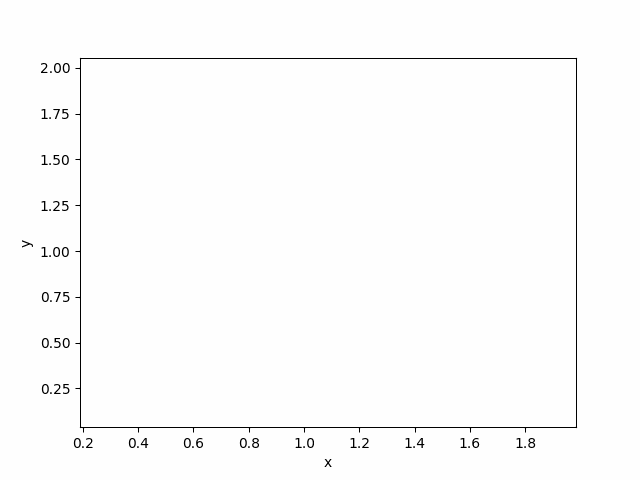

In [35]:
triang_vis=triangulation_draw(polygon_four)
triang_vis.show_gif()

Zwizualizuj powstały wielokąt podzielony na trójkąty.